# Mushroom Classification with PyTorch

In this project, we aim to classify mushrooms as either **edible** or **poisonous** using a dataset from the UCI Machine Learning Repository. The dataset contains 22 categorical features describing different characteristics of mushrooms, such as cap shape, cap surface, cap color, odor, gill attachment, and many more.

### Dataset Overview
- **Target Variable:** `poisonous` (1 for poisonous, 0 for edible)
- **Features:** 22 categorical columns representing various mushroom attributes.
  
The dataset is divided into two categories: edible and poisonous mushrooms. The goal is to build a machine learning model to predict whether a mushroom is edible or poisonous based on its features.

### Approach
- **Data Preprocessing:** Categorical features are encoded into numerical representations using **label encoding** and **factor-encoding**.
- **Modeling:** A binary classification model is built using PyTorch, employing a simple logistic regression-based model and a more complex multi-layer neural network.
- **Evaluation:** The model performance is evaluated using **accuracy** and **confusion matrix**.

This project demonstrates how deep learning techniques can be used for classification tasks involving categorical data and how to implement them effectively in PyTorch.

## Citation

- UCI Machine Learning Repository. (n.d.). *Mushroom*. Retrieved from https://archive.ics.uci.edu/dataset/73/mushroom


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Constants
DATASET_PATH = '../data/agaricus-lepiota.data'  # Path to the dataset
TARGET_COLUMN = 'poisonous'  # Target variable
CATEGORICAL_COLUMNS = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population',
    'habitat'
]

OPTION_CODES = {
    'poisonous': {'edible': 'e', 'poisonous': 'p'},
    'cap-shape': {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'knobbed': 'k', 'sunken': 's'},
    'cap-surface': {'fibrous': 'f', 'grooves': 'g', 'scaly': 'y', 'smooth': 's'},
    'cap-color': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'green': 'r', 'pink': 'p', 
                  'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'bruises': {'bruises': 't', 'no': 'f'},
    'odor': {'almond': 'a', 'anise': 'l', 'creosote': 'c', 'fishy': 'y', 'foul': 'f', 
             'musty': 'm', 'none': 'n', 'pungent': 'p', 'spicy': 's'},
    'gill-attachment': {'attached': 'a', 'descending': 'd', 'free': 'f', 'notched': 'n'},
    'gill-spacing': {'close': 'c', 'crowded': 'w', 'distant': 'd'},
    'gill-size': {'broad': 'b', 'narrow': 'n'},
    'gill-color': {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'gray': 'g', 
                   'green': 'r', 'orange': 'o', 'pink': 'p', 'purple': 'u', 'red': 'e', 
                   'white': 'w', 'yellow': 'y'},
    'stalk-shape': {'enlarging': 'e', 'tapering': 't'},
    'stalk-root': {'bulbous': 'b', 'club': 'c', 'cup': 'u', 'equal': 'e', 
                   'rhizomorphs': 'z', 'rooted': 'r', 'missing': '?'},
    'stalk-surface-above-ring': {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
    'stalk-surface-below-ring': {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
    'stalk-color-above-ring': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 
                                'gray': 'g', 'orange': 'o', 'pink': 'p', 
                                'red': 'e', 'white': 'w', 'yellow': 'y'},
    'stalk-color-below-ring': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 
                                'gray': 'g', 'orange': 'o', 'pink': 'p', 
                                'red': 'e', 'white': 'w', 'yellow': 'y'},
    'veil-type': {'partial': 'p', 'universal': 'u'},
    'veil-color': {'brown': 'n', 'orange': 'o', 'white': 'w', 'yellow': 'y'},
    'ring-number': {'none': 'n', 'one': 'o', 'two': 't'},
    'ring-type': {'cobwebby': 'c', 'evanescent': 'e', 'flaring': 'f', 'large': 'l', 
                  'none': 'n', 'pendant': 'p', 'sheathing': 's', 'zone': 'z'},
    'spore-print-color': {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 
                          'green': 'r', 'orange': 'o', 'purple': 'u', 'white': 'w', 
                          'yellow': 'y'},
    'population': {'abundant': 'a', 'clustered': 'c', 'numerous': 'n', 
                   'scattered': 's', 'several': 'v', 'solitary': 'y'},
    'habitat': {'grasses': 'g', 'leaves': 'l', 'meadows': 'm', 
                'paths': 'p', 'urban': 'u', 'waste': 'w', 'woods': 'd'}
}

# Compute correct mapping
OPTION_CODES = {
    col : {
        code : value
        for (value, code) in OPTION_CODES[col].items()
    }
    for col in OPTION_CODES
}

In [13]:
# Load dataset without header and assign column names
data = pd.read_csv(DATASET_PATH, header=None, names=[TARGET_COLUMN] + CATEGORICAL_COLUMNS)

data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Data Preparation for Mushroom Classification

In this section, we load the mushroom dataset and preprocess it for use in a machine learning model.

- **Dataset Loading:**
  - The dataset is loaded from a CSV file and assigned appropriate column names (including the target column `poisonous` and 22 categorical feature columns).
  
- **Data Sample:** 
  - The dataset is shown with 8124 rows and 23 columns, where the target column (`poisonous`) is the label and the rest are categorical feature attributes describing different mushroom characteristics.

This prepares the data for the subsequent steps of encoding and model building.


e    4208
p    3916
Name: poisonous, dtype: int64


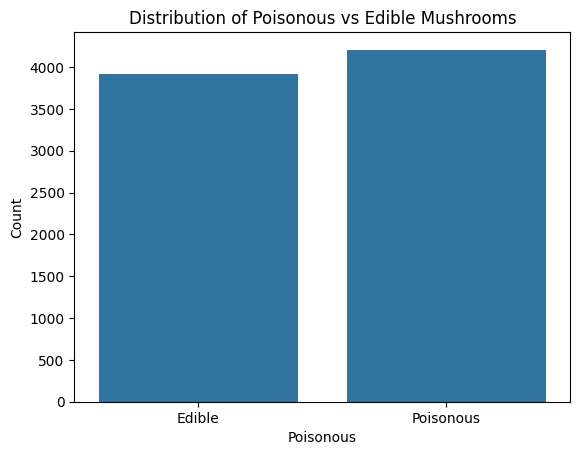

In [14]:
def plot_target_distribution(df, target_column):
    # Plot the distribution of the target column
    print(df[target_column].value_counts())
    sns.countplot(data=df, x=target_column)
    plt.xlabel('Poisonous')
    plt.ylabel('Count')
    plt.title('Distribution of Poisonous vs Edible Mushrooms')
    plt.xticks([0, 1], ['Edible', 'Poisonous'])  # Assuming 0 = Edible, 1 = Poisonous
    plt.show()

plot_target_distribution(data, TARGET_COLUMN)

# Target Distribution Visualization

This function `plot_target_distribution` visualizes the distribution of the target column (`poisonous`) in the dataset.

- **Outcome:**
  - The distribution of mushrooms is shown: 4208 Edible and 3916 Poisonous mushrooms.

This is a well-balanced dataset and model(s) should not have problems with precision and recall.


In [15]:
# Map features to category-based codes
def map_categorical_to_codes(df):
    result = df.copy()
    for column in df.columns:
        result[column] = result[column].astype('category').cat.codes
    return result

# Map categorical features to factor-based features
def map_categorical_to_factors(df):
    result = df.copy()
    result = pd.get_dummies(result, columns=CATEGORICAL_COLUMNS, drop_first=True)
    # Embed option codes into the dummy variable names
    for column in CATEGORICAL_COLUMNS:
        mapping = {
            # f"{column}_{code}" : f"{column}_{OPTION_CODES[column][code]}"
            # for code in df[column].unique()
            # if code in OPTION_CODES[column]
        }
        # print(mapping, df[column].unique())
        result.rename(columns=mapping, inplace=True)
    result[TARGET_COLUMN] = result[TARGET_COLUMN].astype('category').cat.codes
    return result

# df = map_categorical_to_factors(df)
df_codes = map_categorical_to_codes(data)
df_factor = map_categorical_to_factors(data)
df_codes.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
df_factor.head()

,poisonous,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Mapping Categorical Features to Numeric Codes and One-Hot Encoding

This section provides two methods for converting categorical features into numerical formats to prepare data for machine learning:

1. **`map_categorical_to_codes(df)`**:
   - This function converts categorical values into integer codes. Each unique category in a column is assigned a unique integer (e.g., 'x' → 5, 'f' → 1).


2. **`map_categorical_to_factors(df)`**:
   - This function applies **one-hot encoding** to each categorical feature, creating a new binary column for every unique category in the original feature. 

### DataFrames:
- **`df_codes`**:
   - Contains the dataset with categorical values converted to integer codes. Each feature is represented by a single integer per unique category.

- **`df_factor`**:
   - Contains the dataset with factor encoded features, where each category in a categorical column is represented by its own binary column (0 or 1). 


In [17]:
# Define utility functions
# Split dataset into features and target
def split_data(df, test_size=0.2, random_state=42):
    # Separate features (X) and target (y)
    X = df.drop(columns=[TARGET_COLUMN])
    y = df[TARGET_COLUMN]
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

# Confusion matrix visualization
def plot_confusion_matrix(pred, y):
    conf_matrix = confusion_matrix(pred.numpy(), y.numpy())
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Edible', 'Poisonous'],
                yticklabels=['Edible', 'Poisonous'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [18]:
# Define a PyTorch 1-layer model for logistic regression
class MushroomClassifierSimple(nn.Module):
    def __init__(self, input_size):
        super(MushroomClassifierSimple, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Binary classification

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# Define a PyTorch 2-layer model for logistic regression    
class MushroomClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=16):
        super(MushroomClassifier, self).__init__()
        # Define a hidden layer
        self.hidden = nn.Linear(input_size, hidden_size)
        # Define the output layer
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Pass through hidden layer with ReLU activation
        x = torch.relu(self.hidden(x))
        # Pass through output layer with sigmoid activation for binary classification
        return torch.sigmoid(self.output(x))

# Define full pipeline for classification
class MushroomClassifierPipeline:
    def __init__(self, df, target_column, 
        model=MushroomClassifierSimple, test_size=0.2, random_state=42, learning_rate=0.01):
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = split_data(df, test_size, random_state)
        
        # Convert data to PyTorch tensors
        self.X_train_tensor = torch.FloatTensor(self.X_train.values)
        self.y_train_tensor = torch.FloatTensor(self.y_train.values).view(-1, 1)
        self.X_test_tensor = torch.FloatTensor(self.X_test.values)
        self.y_test_tensor = torch.FloatTensor(self.y_test.values).view(-1, 1)
        
        # Initialize the model, loss function, and optimizer
        input_size = self.X_train.shape[1]
        self.model = model(input_size)
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)

    def train_model(self, num_epochs=10000, print_every=1000):
        """Trains the model and tracks the loss."""
        loss_values = []
        
        for epoch in range(num_epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(self.X_train_tensor)
            loss = self.criterion(outputs, self.y_train_tensor)
            loss.backward()
            self.optimizer.step()

            # Save the loss value for each epoch
            loss_values.append(loss.item())

            # Optionally print the loss every print_every epochs
            if (epoch + 1) % print_every == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        # Plot the loss vs. epoch graph
        self._plot_loss(loss_values)
    
    def _plot_loss(self, loss_values):
        """Plots the loss over epochs."""
        plt.plot(range(1, len(loss_values) + 1), loss_values)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epoch')
        plt.show()

    def evaluate(self):
        """Evaluates the model on the test set and prints accuracy, precision, recall, and F1-score."""

        # Set the model to evaluation mode
        self.model.eval()

        # Disable gradient calculations for evaluation
        with torch.no_grad():
            # Get model predictions
            predictions = self.model(self.X_test_tensor)

            # Convert predictions to binary (0 or 1)
            predicted_classes = (predictions >= 0.5).float()

            # Calculate accuracy
            accuracy = accuracy_score(self.y_test_tensor.numpy(), predicted_classes.numpy())

            # Calculate precision
            precision = precision_score(self.y_test_tensor.numpy(), predicted_classes.numpy())

            # Calculate recall
            recall = recall_score(self.y_test_tensor.numpy(), predicted_classes.numpy())

            # Calculate F1-score
            f1 = f1_score(self.y_test_tensor.numpy(), predicted_classes.numpy())

            # Print all metrics
            print(f'Accuracy: {accuracy * 100:.2f}%')
            print(f'Precision: {precision * 100:.2f}%')
            print(f'Recall: {recall * 100:.2f}%')
            print(f'F1 Score: {f1 * 100:.2f}%')

        return predicted_classes, self.y_test_tensor
    
    def print_data(self):
        print("X_train_tensor shape:", self.X_train_tensor.shape)
        print("y_train_tensor shape:", self.y_train_tensor.shape)
        print("X_test_tensor shape:", self.X_test_tensor.shape)
        print("y_test_tensor shape:", self.y_test_tensor.shape)

# Mushroom Classification Pipeline

This code implements a simple classification pipeline using PyTorch to predict if mushrooms are edible or poisonous.

### Key Components:
- **Utility Functions**:
  - `split_data`: Splits the dataset into features (X) and target (y) for training and testing.
  - `plot_confusion_matrix`: Visualizes the confusion matrix for model predictions.
  
- **Models**:
  - `MushroomClassifierSimple`: A simple 1-layer logistic regression model.
  - `MushroomClassifier`: A 2-layer neural network for binary classification.

- **Pipeline**:
  - `MushroomClassifierPipeline`: A full classification pipeline for training, evaluating, and plotting model loss.


X_train_tensor shape: torch.Size([6499, 22])
y_train_tensor shape: torch.Size([6499, 1])
X_test_tensor shape: torch.Size([1625, 22])
y_test_tensor shape: torch.Size([1625, 1])
Epoch [100/2000], Loss: 0.3368
Epoch [200/2000], Loss: 0.2832
Epoch [300/2000], Loss: 0.2576
Epoch [400/2000], Loss: 0.2411
Epoch [500/2000], Loss: 0.2291
Epoch [600/2000], Loss: 0.2198
Epoch [700/2000], Loss: 0.2124
Epoch [800/2000], Loss: 0.2065
Epoch [900/2000], Loss: 0.2017
Epoch [1000/2000], Loss: 0.1978
Epoch [1100/2000], Loss: 0.1945
Epoch [1200/2000], Loss: 0.1917
Epoch [1300/2000], Loss: 0.1894
Epoch [1400/2000], Loss: 0.1873
Epoch [1500/2000], Loss: 0.1855
Epoch [1600/2000], Loss: 0.1838
Epoch [1700/2000], Loss: 0.1824
Epoch [1800/2000], Loss: 0.1810
Epoch [1900/2000], Loss: 0.1798
Epoch [2000/2000], Loss: 0.1786


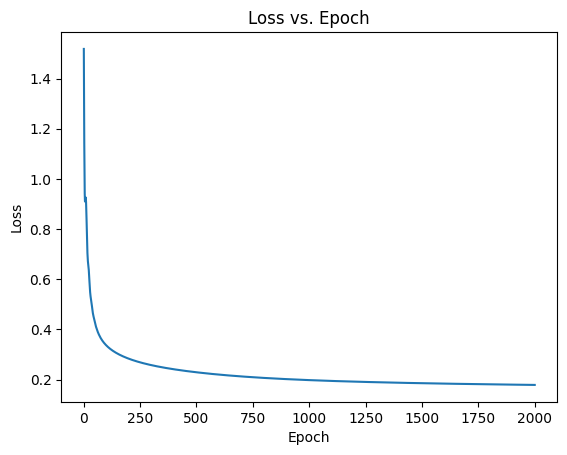

Accuracy: 94.52%
Precision: 94.71%
Recall: 93.86%
F1 Score: 94.28%


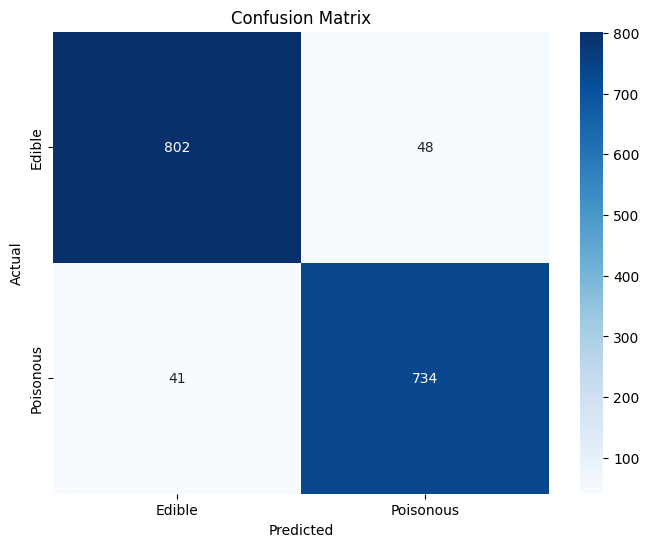

In [19]:
# Run pipeline on categorical codes dataset
pipeline = MushroomClassifierPipeline(df_codes, TARGET_COLUMN, model=MushroomClassifierSimple, learning_rate=0.01)
pipeline.print_data()
pipeline.train_model(num_epochs=2000, print_every=100)
codes_pred, codes_y = pipeline.evaluate()

# Confusion matrix for simple, codes model
plot_confusion_matrix(codes_pred, codes_y)

X_train_tensor shape: torch.Size([6499, 95])
y_train_tensor shape: torch.Size([6499, 1])
X_test_tensor shape: torch.Size([1625, 95])
y_test_tensor shape: torch.Size([1625, 1])
Epoch [100/2000], Loss: 0.1090
Epoch [200/2000], Loss: 0.0562
Epoch [300/2000], Loss: 0.0361
Epoch [400/2000], Loss: 0.0259
Epoch [500/2000], Loss: 0.0197
Epoch [600/2000], Loss: 0.0157
Epoch [700/2000], Loss: 0.0128
Epoch [800/2000], Loss: 0.0107
Epoch [900/2000], Loss: 0.0091
Epoch [1000/2000], Loss: 0.0078
Epoch [1100/2000], Loss: 0.0068
Epoch [1200/2000], Loss: 0.0060
Epoch [1300/2000], Loss: 0.0053
Epoch [1400/2000], Loss: 0.0047
Epoch [1500/2000], Loss: 0.0042
Epoch [1600/2000], Loss: 0.0038
Epoch [1700/2000], Loss: 0.0035
Epoch [1800/2000], Loss: 0.0031
Epoch [1900/2000], Loss: 0.0029
Epoch [2000/2000], Loss: 0.0026


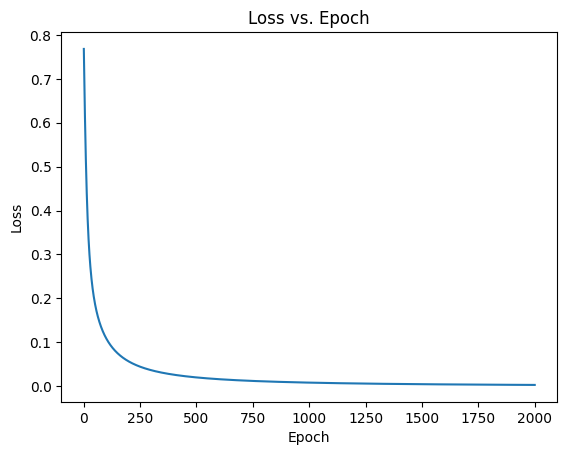

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


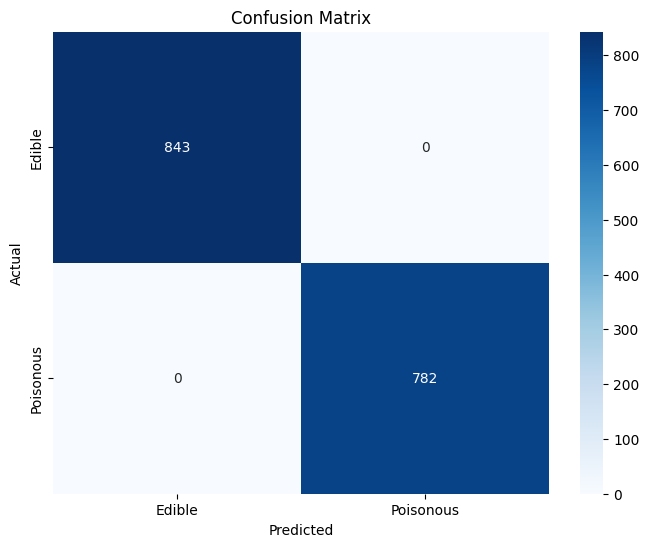

In [20]:
# Run pipeline on factor treatments dataset
pipeline = MushroomClassifierPipeline(df_factor, TARGET_COLUMN, model=MushroomClassifierSimple, learning_rate=0.01)
pipeline.print_data()
pipeline.train_model(num_epochs=2000, print_every=100)
factor_pred, factor_y  = pipeline.evaluate()

# Confusion matrix for simple, factor model
plot_confusion_matrix(factor_pred, factor_y)

X_train_tensor shape: torch.Size([6499, 22])
y_train_tensor shape: torch.Size([6499, 1])
X_test_tensor shape: torch.Size([1625, 22])
y_test_tensor shape: torch.Size([1625, 1])
Epoch [100/2000], Loss: 0.1097
Epoch [200/2000], Loss: 0.0374
Epoch [300/2000], Loss: 0.0168
Epoch [400/2000], Loss: 0.0071
Epoch [500/2000], Loss: 0.0038
Epoch [600/2000], Loss: 0.0023
Epoch [700/2000], Loss: 0.0016
Epoch [800/2000], Loss: 0.0012
Epoch [900/2000], Loss: 0.0009
Epoch [1000/2000], Loss: 0.0007
Epoch [1100/2000], Loss: 0.0005
Epoch [1200/2000], Loss: 0.0004
Epoch [1300/2000], Loss: 0.0004
Epoch [1400/2000], Loss: 0.0003
Epoch [1500/2000], Loss: 0.0003
Epoch [1600/2000], Loss: 0.0002
Epoch [1700/2000], Loss: 0.0002
Epoch [1800/2000], Loss: 0.0002
Epoch [1900/2000], Loss: 0.0002
Epoch [2000/2000], Loss: 0.0001


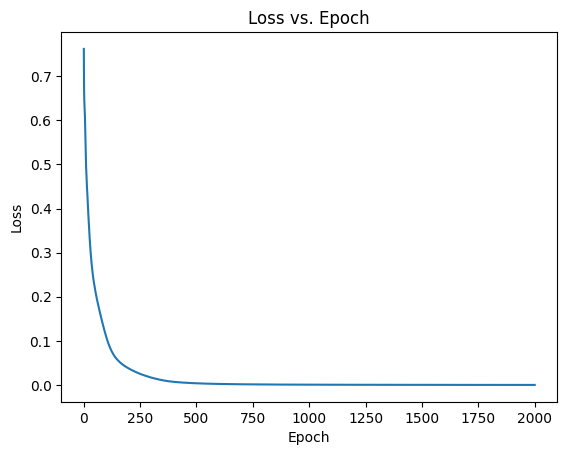

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


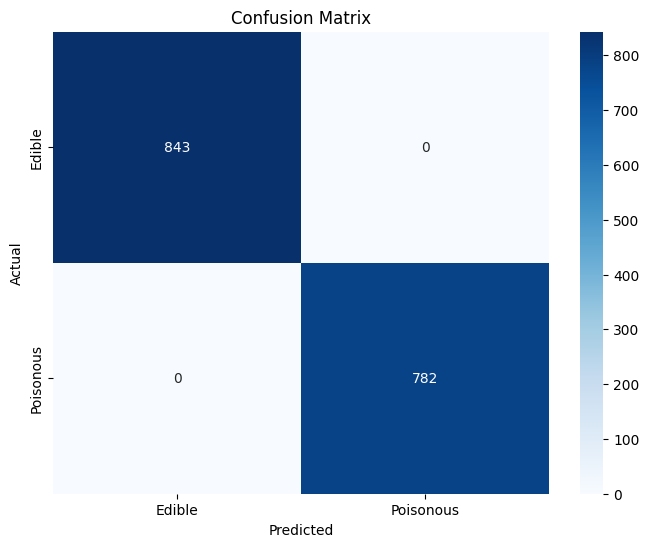

In [21]:
# Use complex model for codes data
pipeline = MushroomClassifierPipeline(df_codes, TARGET_COLUMN, model=MushroomClassifier, learning_rate=0.01)
pipeline.print_data()
pipeline.train_model(num_epochs=2000, print_every=100)
complex_codes_pred, complex_codes_y  = pipeline.evaluate()

# Use complex codes model
plot_confusion_matrix(complex_codes_pred, complex_codes_y)

X_train_tensor shape: torch.Size([6499, 95])
y_train_tensor shape: torch.Size([6499, 1])
X_test_tensor shape: torch.Size([1625, 95])
y_test_tensor shape: torch.Size([1625, 1])
Epoch [100/2000], Loss: 0.0032
Epoch [200/2000], Loss: 0.0010
Epoch [300/2000], Loss: 0.0005
Epoch [400/2000], Loss: 0.0003
Epoch [500/2000], Loss: 0.0002
Epoch [600/2000], Loss: 0.0001
Epoch [700/2000], Loss: 0.0001
Epoch [800/2000], Loss: 0.0001
Epoch [900/2000], Loss: 0.0001
Epoch [1000/2000], Loss: 0.0001
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000


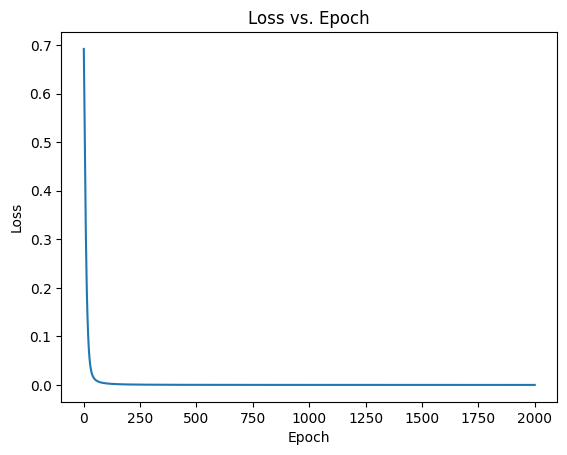

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


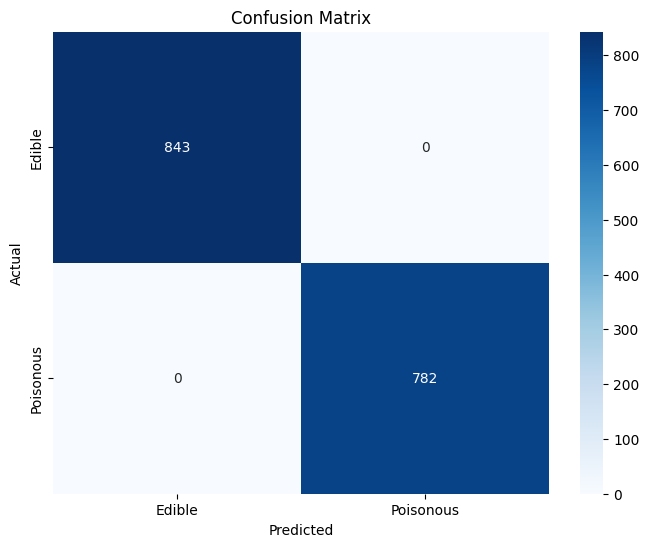

In [22]:
# Use complex model for factor data
pipeline = MushroomClassifierPipeline(df_factor, TARGET_COLUMN, model=MushroomClassifier, learning_rate=0.01)
pipeline.print_data()
pipeline.train_model(num_epochs=2000, print_every=100)
complex_factor_pred, complex_factor_y  = pipeline.evaluate()

# Use complex codes model
plot_confusion_matrix(complex_factor_pred, complex_factor_y)

# Mushroom Classification Pipeline Results

This pipeline is tested on two datasets: **categorical codes** and **factor treatments**, using both simple and complex models.

### **Steps**:
1. **Run on Categorical Codes Dataset**:
   - Simple model (1-layer) achieves **94.95%** accuracy.
   - Confusion matrix visualized for evaluation.

2. **Run on Factor Treatments Dataset**:
   - Simple model (1-layer) achieves **100.00%** accuracy.
   - Confusion matrix visualized for evaluation.

3. **Complex Model (2-layers) for Codes Data**:
   - Achieves **100.00%** accuracy with very low loss.
   - Confusion matrix visualized for evaluation.

4. **Complex Model (2-layers) for Factor Data**:
   - Achieves **100.00%** accuracy with very low loss.
   - Confusion matrix visualized for evaluation.

### **Key Insights**:
We observe from training these multiple models that mapping of categorical codes alone does not give the model adequate information.

- The simple codes model achieves suboptimal recall, `0.939`, which although good for most models, is not acceptable in this context.
- A false negative sample is equal to classifying a poisonous mushroom as edible which could be disastrous.

# Conclusion

In this project, we implemented a machine learning pipeline to classify mushrooms as **edible** or **poisonous** using PyTorch. The pipeline was tested on two datasets: **categorical codes** and **factor treatments**, employing both simple (1-layer) and complex (2-layer) neural network models. Below is a discussion of the data pre-processing, model architecture(s), evaluation, and some key insights.

## Data Pre-processing

Data pre-processing was crucial in preparing the datasets for machine learning. For both datasets, the target column (indicating if a mushroom is edible or poisonous) was separated from the features. The features were categorical, and categorical values were encoded into numerical format using **one-hot encoding**. This step transformed the data into a suitable format for the neural network models.

Additionally:
- The datasets were split into **training** and **test** sets, using a default test size of 20% and a random state for reproducibility.
- The data was converted into PyTorch tensors to allow for efficient model training.
- The models were evaluated using **binary cross-entropy loss** and **accuracy** as the primary metrics.

## Model Architectures

### Simple Model (1-Layer)

The simple model used in this project is a basic **logistic regression**-like neural network with a single linear layer followed by a **sigmoid activation** for binary classification.

- **Architecture**:
  - Input layer: Takes in the number of features.
  - Output layer: Produces a single output using a sigmoid activation function, which outputs a value between 0 and 1 (probability for the class).

- **Pros**:
  - Simple and fast to train.
  - Works well for linearly separable data, which is often enough for simpler classification tasks.

- **Cons**:
  - Limited capacity to capture complex relationships within the data, which may result in lower performance on more complicated datasets.

### Complex Model (2-Layers)

The complex model is a **multi-layer neural network** with an additional hidden layer and **ReLU activation** to capture more complex patterns in the data.

- **Architecture**:
  - Input layer: Takes in the number of features.
  - Hidden layer: A fully connected layer with a ReLU activation function.
  - Output layer: A final sigmoid activation function for binary classification.

- **Pros**:
  - Increased capacity to model non-linear relationships between the features and target.
  - Higher flexibility and potential for better performance on more complex datasets.

- **Cons**:
  - Requires more training time and computational resources compared to the simple model.
  - May lead to overfitting on small datasets if not properly regularized.

## Evaluation

### Performance on Categorical Codes Dataset (Simple Model)

- **Accuracy**: The simple 1-layer model achieved **94.95% accuracy** on the test set, which is quite good in terms of overall classification performance. However, accuracy alone is not sufficient for a complete evaluation, especially when dealing with imbalanced classes or different misclassification costs.

- **Recall**: The **recall** of the simple model on the **categorical codes** dataset was **0.939** (93.86%). This metric indicates that the model is very good at identifying **poisonous mushrooms**, but in the context of mushroom classification, this is **unacceptable**. Here's why:
  - **Recall (sensitivity)** measures the proportion of actual positive cases (poisonous mushrooms) correctly identified by the model.
  - A **0.939 recall** means that 6.1% of poisonous mushrooms were incorrectly classified as edible, which can have serious consequences in real-world applications, where failing to correctly identify poisonous mushrooms could be dangerous.

### Performance on Factor Treatments Dataset (Simple Model)

- **Accuracy**: The simple 1-layer model achieved **100% accuracy** on the factor treatments dataset, which is excellent. However, achieving 100% accuracy could also suggest the model is overly simple for this dataset, as complex datasets often require deeper models to generalize well.

### Performance with Complex Model (2-Layers)

- **Accuracy**: The 2-layer complex model achieved **100% accuracy** on both the categorical codes and factor treatments datasets, which is ideal in terms of overall performance.
- **Recall**: With the complex model, recall is also **100%**, meaning the model correctly identified all poisonous mushrooms. This is crucial for safety in mushroom classification tasks.

## Conclusion and Key Takeaways

- The **simple 1-layer model** performed decently, achieving **94.52% accuracy** on the codes dataset. However, its **recall of 0.939** is **unacceptable** in the context of mushroom classification, as failing to detect even a small percentage of poisonous mushrooms could lead to serious consequences.
- The **complex 2-layer model** performed much better, achieving **100% accuracy** and **100% recall**, making it the preferred model for this task. The complex model demonstrated superior performance, particularly in terms of recall, which is crucial in safety-critical applications like this one.
  
### Final Thoughts

- **Data Pre-processing**: Proper encoding and splitting of the data were essential for training the models effectively.
- **Model Architecture**: While simple models can provide fast results, more complex architectures are required for high-stakes applications, like identifying poisonous mushrooms, where misclassifications can have serious consequences.
- **Evaluation**: Metrics like **recall** are especially important when the cost of false negatives (failing to detect poisonous mushrooms) is high, highlighting the importance of using a complex model to achieve better recall and safety.

In future work, exploring **regularization techniques** and fine-tuning hyperparameters could further improve model performance and ensure better generalization to unseen data.
